**Import necessary libraries**



In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import layers, models
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Upload the path of google drive and set parameters**

In [7]:
# Set the path to your dataset on Google Drive
path = '/content/drive/MyDrive/dataset'

# Image and training parameters
img_size = (224, 224)
batch_size = 32
epochs = 10


**Data augmentation and preprocessing part**

In [8]:
# Data preprocessing using ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3,
    horizontal_flip=True,
    vertical_flip=True
)

# Grayscale loader function
def to_grayscale(image):
    return tf.image.rgb_to_grayscale(image)

# Apply grayscale transformation
def preprocess(image):
    image = tf.image.resize(image, img_size)
    image = tf.image.rgb_to_grayscale(image)
    image = tf.image.grayscale_to_rgb(image)  # Convert back to 3-channel
    return image

# Train generator
train_generator = train_datagen.flow_from_directory(
    path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True
)

# Validation/Test generator
test_generator = train_datagen.flow_from_directory(
    path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False
)


Found 178 images belonging to 2 classes.
Found 75 images belonging to 2 classes.


**Choose DenseNet121 model and create model**

In [9]:
# Load base model
base_model = DenseNet121(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model

# Add custom layers
model = models.Sequential([
    layers.Input(shape=(224, 224, 3)),
    layers.Lambda(preprocess),  # Apply grayscale conversion
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                 │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ densenet121 (Functional)        │ (None, 7, 7, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,300,161 (27.85 MB)

 Trainable params: 262,657 (1.00 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

**The process of train the Model**

In [10]:
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 74s 9s/step - accuracy: 0.5469 - loss: 1.1218 - val_accuracy: 0.6800 - val_loss: 0.5541
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 43s 7s/step - accuracy: 0.6418 - loss: 0.6563 - val_accuracy: 0.8533 - val_loss: 0.3626
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 41s 7s/step - accuracy: 0.7791 - loss: 0.4319 - val_accuracy: 0.8800 - val_loss: 0.3351
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 41s 7s/step - accuracy: 0.9147 - loss: 0.2927 - val_accuracy: 0.8933 - val_loss: 0.3207
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 44s 8s/step - accuracy: 0.7727 - loss: 0.4262 - val_accuracy: 0.8800 - val_loss: 0.3383
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 81s 8s/step - accuracy: 0.8820 - loss: 0.2721 - val_accuracy: 0.8800 - val_loss: 0.2965
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 50s 10s/step - accuracy: 0.9037 - loss: 0.2714 - val_accuracy: 0.8800 - val_loss: 0.3144
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 42s 7s/step - accuracy: 0.8855 - loss: 0.2815 - val_accuracy: 0.8400 - val_loss: 0.2968
Epoch 9

**Plot Training & Validation Accuracy**

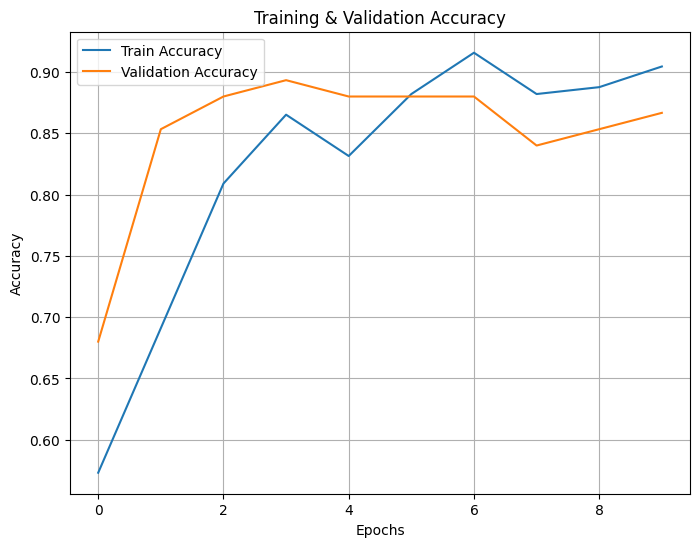

In [14]:
# Plot Training & Validation Accuracy & Loss
import matplotlib.pyplot as plt

# Accuracy Plot
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()




**Finally Evaluate the Model & it's Metrics**

3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step
Classification Report:

              precision    recall  f1-score   support

   Non Tumor       0.88      0.96      0.92        46
       Tumor       0.92      0.79      0.85        29

    accuracy                           0.89        75
   macro avg       0.90      0.87      0.88        75
weighted avg       0.90      0.89      0.89        75



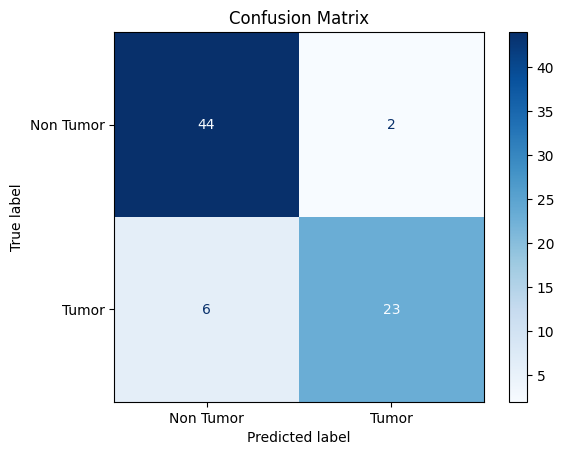

In [15]:
# Predict on test set
y_pred_probs = model.predict(test_generator)
y_pred = (y_pred_probs > 0.5).astype(int).reshape(-1)
y_true = test_generator.classes

# Classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=['Non Tumor', 'Tumor']))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non Tumor', 'Tumor'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


**Loss graph CNN**

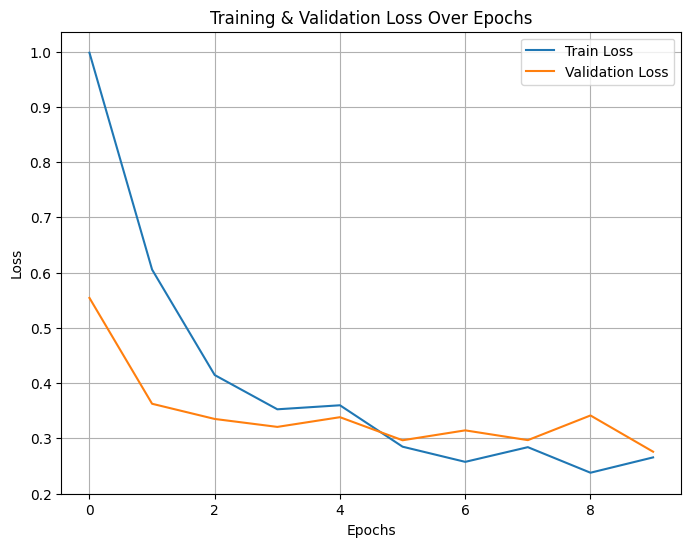

In [16]:
# Plot Training & Validation Loss
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()
